In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('..')
from utils import load_plotting_config, get_mpl_dimensions, setup_matplotlib_params
from aquarel import load_theme

In [45]:
# Load data and plotting configuration parameters
iris = pd.read_csv('iris.csv')
plotting_config = load_plotting_config()

## Panel B

<Figure size 640x480 with 0 Axes>

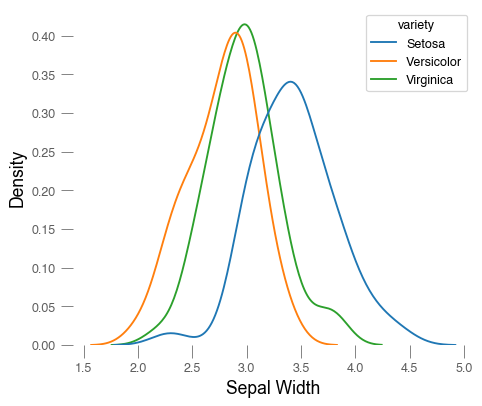

In [46]:
# Matplotlib messes up the dimensions when saving to svg, consistently undersizing the figure.
# I think it has something to do with the points (pt) to pixel unit conversion. As in, 90 pixels per 72 points.
# It appears that matplotlib is using the 72 as DPI when saving to svg... so accounting for that with a factor of 1.25 helps.
# However, tight layout can change aspect ration, so x_scale factor of 1.36 can improve aesthetics. 
mpl_dimensions = get_mpl_dimensions(plotting_config['subfigure_width']/2, plotting_config['subfigure_height'], plotting_config)

setup_matplotlib_params(plotting_config)

with load_theme(plotting_config['aquarel_theme']):
    # Create figure with seaborn using config parameters
    plt.figure(figsize=mpl_dimensions,
               dpi=plotting_config['dpi'])

    # Create KDE plot
    sns.kdeplot(data=iris, x='sepal_width', hue='variety')

    # Configure styling
    plt.xlabel('Sepal Width', fontsize=plotting_config['axis_label_size'],
            fontfamily=plotting_config['font_family'])
    plt.ylabel('Density', fontsize=plotting_config['axis_label_size'],
            fontfamily=plotting_config['font_family'])
    plt.tick_params(labelsize=plotting_config['tick_label_size'])

    # Save figure
    plt.savefig('panel_B.svg', bbox_inches='tight')
    plt.show()


## Panel C

<Figure size 640x480 with 0 Axes>

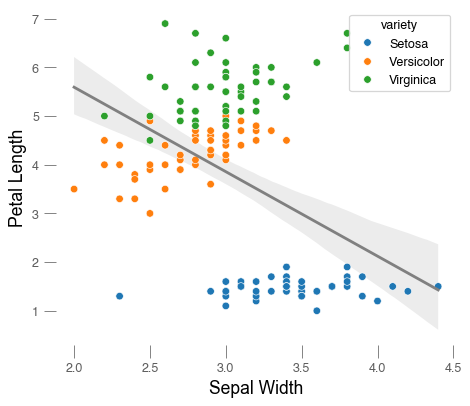

In [47]:
with load_theme(plotting_config['aquarel_theme']):
    # Create figure with seaborn using config parameters
    plt.figure(figsize=mpl_dimensions,
               dpi=plotting_config['dpi'])

    # Create scatter plot with regression line
    sns.regplot(data=iris, x='sepal_width', y='petal_length', scatter=False, color='gray')
    sns.scatterplot(data=iris, x='sepal_width', y='petal_length', hue='variety')

    # Configure styling
    plt.xlabel('Sepal Width', fontsize=plotting_config['axis_label_size'],
            fontfamily=plotting_config['font_family'])
    plt.ylabel('Petal Length', fontsize=plotting_config['axis_label_size'],
            fontfamily=plotting_config['font_family'])
    plt.tick_params(labelsize=plotting_config['tick_label_size'])

    # Save figure
    plt.savefig('panel_C.svg', bbox_inches='tight', dpi=plotting_config['dpi'])
    plt.show()